## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## Importing the data and undrstanding it

In [2]:
carprice=pd.read_csv("CarPrice_Assignment.csv")

In [3]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
carprice.shape

(205, 26)

In [5]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


- In this data set we have 205 rows and 26 columns.
- We do not have any missing values.

## Cleaning the data

In [7]:
carprice.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

- Here we saw that drive wheel column contains the 4wd which was not clear that if it is fwd or rwd.
- So we are replacing that value by finding the mode and then replacing it with mode value.

In [8]:
stats.mode(carprice['drivewheel'])

C:\Users\ishan gagerna\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


ModeResult(mode=array(['fwd'], dtype=object), count=array([120]))

In [9]:
carprice['drivewheel']=carprice['drivewheel'].apply(lambda x: x.replace('4wd','fwd'))

- Now we are only taking the names of the company not of the car.
- We are removing the car name.

In [10]:
carprice['CarName'] = carprice['CarName'].str.split(' ').str[0]

In [11]:
carprice['CarName']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
          ...     
175         toyota
176         toyota
177         toyota
178         toyota
179         toyota
180         toyota
181        toyouta
182      vokswagen
183     volkswagen
184     volkswagen
185     volkswagen
186     volkswagen
187     volkswagen
188     volkswagen
189             vw
190             vw
191     volkswagen
192     volkswagen
193     volkswagen
194          volvo
195          volvo
196         

- <font color= blue>Here, we observed spelling mistakes with some company names.
- So, firstly we will correct them and then move foward with our model.</font>

In [12]:
carprice['CarName']=carprice['CarName'].apply(lambda x: x.replace('maxda','mazda'))
carprice['CarName']=carprice['CarName'].apply(lambda x: x.replace('porcshce','porsche'))
carprice['CarName']=carprice['CarName'].apply(lambda x: x.replace('Nissan','nissan'))
carprice['CarName']=carprice['CarName'].apply(lambda x: x.replace('toyouta','toyota'))
carprice['CarName']=carprice['CarName'].apply(lambda x: x.replace('vokswagen','volkswagen'))
carprice['CarName']=carprice['CarName'].apply(lambda x: x.replace('vw','volkswagen'))

- <font color= blue>Dropping the column car_ID as it will be of no use in the model.</font>

In [13]:
carprice=carprice.drop(['car_ID'], axis=1)

## Creating the Dummies values for the categorical variables

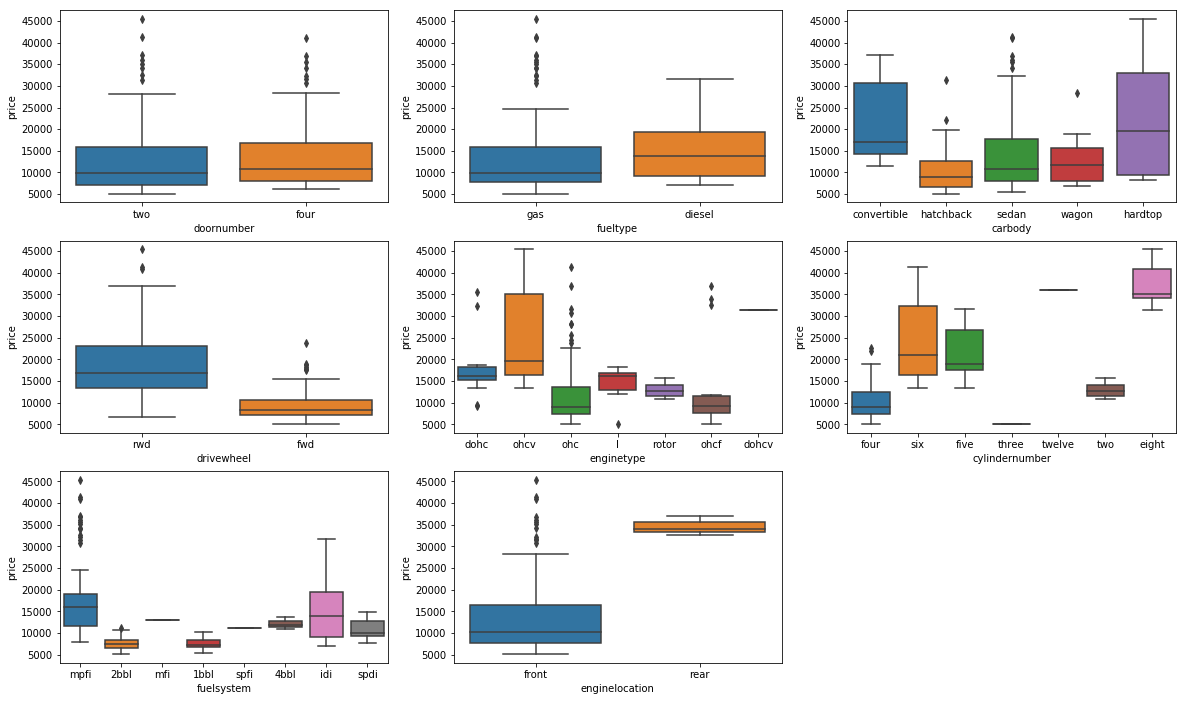

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(3,3,6)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.subplot(3,3,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.show()

In [15]:
carprice['fueltype']=carprice['fueltype'].map({'gas':1,'diesel':0})
carprice['enginelocation']=carprice['enginelocation'].map({'front':1,'rear':0})
carprice['drivewheel']=carprice['drivewheel'].map({'fwd':1,'rwd':0})
carprice['doornumber']=carprice['doornumber'].map({'two':1,'four':0})
carprice['aspiration']=carprice['aspiration'].map({'std':1,'turbo':0})

In [16]:
carprice.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,1,1,1,convertible,0,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,1,1,1,convertible,0,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,1,1,1,hatchback,0,1,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,1,1,0,sedan,1,1,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,1,1,0,sedan,1,1,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
dummies= pd.get_dummies(carprice['carbody'],drop_first=True)
carprice =pd.concat([carprice,dummies],axis=1)

In [18]:
dummies= pd.get_dummies(carprice['enginetype'],drop_first=True)
carprice =pd.concat([carprice,dummies],axis=1)

In [19]:
dummies= pd.get_dummies(carprice['cylindernumber'],drop_first=True)
carprice =pd.concat([carprice,dummies],axis=1)

In [20]:
dummies= pd.get_dummies(carprice['fuelsystem'],drop_first=True)
carprice =pd.concat([carprice,dummies],axis=1)

In [21]:
dummies= pd.get_dummies(carprice['CarName'],drop_first=True)
carprice =pd.concat([carprice,dummies],axis=1)

In [22]:
carprice= carprice.drop(['fuelsystem','cylindernumber','enginetype','carbody'], axis=1)

In [23]:
carprice= carprice.drop(['CarName'], axis=1)

In [24]:
carprice.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,1,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,0,1,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,0,1,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


In [25]:
carprice.shape

(205, 64)

## Dividing the data into test and train cases

In [26]:
df_train, df_test = train_test_split(carprice, train_size=0.7, test_size=0.3, random_state=100)

In [27]:
df_train.shape

(143, 64)

In [28]:
# create object for MinMaxScaler
scaler= MinMaxScaler()

# Taking all the variables for which we need to find min and max
vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight',
        'enginesize','boreratio','stroke','compressionratio', 'horsepower',
       'peakrpm','citympg','highwaympg','price']


# Fitting the value.
df_train[vars] = scaler.fit_transform(df_train[vars])

C:\Users\ishan gagerna\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\ishan gagerna\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ishan gagerna\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] =

In [29]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.909091,0.818182,0.440559,0.650350,0.993007,0.411141,0.525476,0.461655,0.509004,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.239200,0.288490,0.387050,0.498199,0.478536,0.083624,0.205581,0.204848,0.184517,0.215378,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,1.000000,0.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,1.000000,0.000000,1.000000,1.000000,0.341379,0.502439,0.425000,0.522124,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,1.000000,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training the Model

In [30]:
y_train = df_train.pop('price')
X_train = df_train

- Considering all the variables at once and building the model

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

- Using the RFE technique 

In [32]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 42),
 ('fueltype', False, 25),
 ('aspiration', False, 14),
 ('doornumber', False, 50),
 ('drivewheel', False, 41),
 ('enginelocation', True, 1),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 26),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 39),
 ('highwaympg', False, 27),
 ('hardtop', False, 31),
 ('hatchback', False, 30),
 ('sedan', False, 32),
 ('wagon', False, 33),
 ('dohcv', False, 12),
 ('l', False, 7),
 ('ohc', False, 53),
 ('ohcf', False, 10),
 ('ohcv', False, 40),
 ('rotor', True, 1),
 ('five', False, 5),
 ('four', False, 4),
 ('six', False, 29),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', False, 3),
 ('2bbl', False, 44),
 ('4bbl', False, 34),
 ('idi', False, 24),
 ('mfi', False, 46),
 ('mpfi', False, 36),
 ('spdi', False, 35),
 ('spfi

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'rotor', 'three', 'twelve', 'bmw', 'porsche'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'drivewheel',
       'wheelbase', 'carlength', 'carheight', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'five', 'four', 'six', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi', 'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen',
       'volvo'],
      dtype='object')

In [36]:
X_train_rfe = X_train[col]

In [37]:
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Users\ishan gagerna\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [38]:
lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           1.21e-64
Time:                        11:34:34   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1704      0.084      2.022      0.045       0.004       0.337
enginelocation    -0.3298      0.086     -3.844      0.000      -0.500      -0.160
carwidth           0.3283      0.067      4.910      0.000       0.196       0.461
curbweight         0.2989      0.080      3.729      0.000       0.140       0.457
enginesize         0.5732      0.097      5.926      0.000       0.382       0.764
boreratio         -0.1088      0.037     -2.976      0.003      -0.181      -0.036
rotor              0.1542      0.037      4.123      0.000       0.080       0.228
three              0.1802      0.068      2.638      0.009       0.045       0.315
twelve            -0.0536      0.081     -0.659      0.511      -0.214       0.107
bmw                0.2453      0.029      8.327      0.000       0.187       0.304
porsche            0.1565      0.052      3.000      0.003       0.053       0.260
==============================================================================
Omnibus:                       10.995   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.683
Skew:                           0.423   Prob(JB):                     0.000393
Kurtosis:                       4.385   Cond. No.                         38.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,230.92
3,curbweight,9.26
4,enginesize,7.23
2,carwidth,4.92
5,boreratio,1.85
10,porsche,1.82
1,enginelocation,1.66
8,twelve,1.49
6,rotor,1.24
9,bmw,1.13


- Dropping the column curbweight as it has high VIF

In [40]:
X_train_rfe = X_train_rfe.drop(['curbweight'], axis=1)

lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     137.4
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           7.17e-63
Time:                        11:34:34   Log-Likelihood:                 183.70
No. Observations:                 143   AIC:                            -347.4
Df Residuals:                     133   BIC:                            -317.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1700      0.088      1.927      0.056      -0.005       0.345
enginelocation    -0.3474      0.090     -3.872      0.000      -0.525      -0.170
carwidth           0.4725      0.057      8.264      0.000       0.359       0.586
enginesize         0.8075      0.077     10.485      0.000       0.655       0.960
boreratio         -0.0733      0.037     -1.984      0.049      -0.146      -0.000
rotor              0.1859      0.038      4.873      0.000       0.110       0.261
three              0.1917      0.071      2.682      0.008       0.050       0.333
twelve            -0.1324      0.082     -1.610      0.110      -0.295       0.030
bmw                0.2406      0.031      7.806      0.000       0.180       0.302
porsche            0.1001      0.052      1.914      0.058      -0.003       0.203
==============================================================================
Omnibus:                        8.294   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.605
Skew:                           0.459   Prob(JB):                       0.0135
Kurtosis:                       3.776   Cond. No.                         36.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif=pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,230.92
3,enginesize,4.18
2,carwidth,3.28
4,boreratio,1.73
9,porsche,1.67
1,enginelocation,1.66
7,twelve,1.39
5,rotor,1.17
8,bmw,1.13
6,three,1.05


In [42]:
X_train_rfe = X_train_rfe.drop(['porsche'], axis=1)

lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     151.2
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           3.39e-63
Time:                        11:34:35   Log-Likelihood:                 181.76
No. Observations:                 143   AIC:                            -345.5
Df Residuals:                     134   BIC:                            -318.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2575      0.076      3.380      0.001       0.107       0.408
enginelocation    -0.4443      0.075     -5.938      0.000      -0.592      -0.296
carwidth           0.4853      0.057      8.465      0.000       0.372       0.599
enginesize         0.7979      0.078     10.281      0.000       0.644       0.951
boreratio         -0.0587      0.037     -1.607      0.110      -0.131       0.014
rotor              0.1823      0.038      4.738      0.000       0.106       0.258
three              0.1984      0.072      2.751      0.007       0.056       0.341
twelve            -0.1345      0.083     -1.619      0.108      -0.299       0.030
bmw                0.2382      0.031      7.657      0.000       0.177       0.300
==============================================================================
Omnibus:                        5.179   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                4.811
Skew:                           0.353   Prob(JB):                       0.0902
Kurtosis:                       3.556   Cond. No.                         32.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif=pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,168.87
3,enginesize,4.16
2,carwidth,3.23
4,boreratio,1.65
7,twelve,1.39
5,rotor,1.17
1,enginelocation,1.13
8,bmw,1.13
6,three,1.05


In [44]:
X_train_rfe = X_train_rfe.drop(['boreratio'], axis=1)

lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     170.4
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           8.93e-64
Time:                        11:34:35   Log-Likelihood:                 180.40
No. Observations:                 143   AIC:                            -344.8
Df Residuals:                     135   BIC:                            -321.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2303      0.075      3.082      0.002       0.083       0.378
enginelocation    -0.4290      0.075     -5.747      0.000      -0.577      -0.281
carwidth           0.4617      0.056      8.283      0.000       0.351       0.572
enginesize         0.7722      0.076     10.109      0.000       0.621       0.923
rotor              0.1757      0.038      4.566      0.000       0.100       0.252
three              0.1996      0.073      2.753      0.007       0.056       0.343
twelve            -0.1167      0.083     -1.409      0.161      -0.280       0.047
bmw                0.2376      0.031      7.594      0.000       0.176       0.299
==============================================================================
Omnibus:                        2.736   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.227
Skew:                           0.260   Prob(JB):                        0.328
Kurtosis:                       3.321   Cond. No.                         30.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif=pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,160.50
3,enginesize,3.98
2,carwidth,3.02
6,twelve,1.37
4,rotor,1.16
7,bmw,1.13
1,enginelocation,1.11
5,three,1.05


In [46]:
X_train_rfe = X_train_rfe.drop(['twelve'], axis=1)

lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           1.62e-64
Time:                        11:34:35   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2478      0.074      3.350      0.001       0.102       0.394
enginelocation    -0.4454      0.074     -6.020      0.000      -0.592      -0.299
carwidth           0.4850      0.053      9.078      0.000       0.379       0.591
enginesize         0.7192      0.067     10.780      0.000       0.587       0.851
rotor              0.1665      0.038      4.374      0.000       0.091       0.242
three              0.1986      0.073      2.729      0.007       0.055       0.342
bmw                0.2459      0.031      7.975      0.000       0.185       0.307
==============================================================================
Omnibus:                        4.203   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                3.671
Skew:                           0.351   Prob(JB):                        0.159
Kurtosis:                       3.352   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif=pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,156.08
3,enginesize,3.02
2,carwidth,2.75
4,rotor,1.12
6,bmw,1.09
1,enginelocation,1.08
5,three,1.05


In [48]:
X_train_rfe = X_train_rfe.drop(['enginelocation'], axis=1)

lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     182.3
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           1.02e-58
Time:                        11:34:36   Log-Likelihood:                 162.46
No. Observations:                 143   AIC:                            -312.9
Df Residuals:                     137   BIC:                            -295.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1859      0.019     -9.900      0.000      -0.223      -0.149
carwidth       0.4087      0.058      7.023      0.000       0.294       0.524
enginesize     0.8304      0.072     11.553      0.000       0.688       0.973
rotor          0.1842      0.043      4.330      0.000       0.100       0.268
three          0.1868      0.082      2.290      0.024       0.025       0.348
bmw            0.2291      0.034      6.654      0.000       0.161       0.297
==============================================================================
Omnibus:                       43.513   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.600
Skew:                           1.099   Prob(JB):                     2.42e-32
Kurtosis:                       7.428   Cond. No.                         15.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif=pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.00
2,enginesize,2.78
1,carwidth,2.60
3,rotor,1.12
5,bmw,1.08
4,three,1.05


In [50]:
df_test[vars] = scaler.transform(df_test[vars])

C:\Users\ishan gagerna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ishan gagerna\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [51]:
y_test = df_test.pop('price')
X_test = df_test

In [52]:
X_test_sm = sm.add_constant(X_test)

C:\Users\ishan gagerna\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [53]:
var = ['const','enginesize','carwidth','three','rotor','bmw']
X_test_new = pd.DataFrame()
X_test_new[var] = X_test_sm[var]

In [54]:
y_test_pred=lm.predict(X_test_new)
res=y_test-y_test_pred

In [55]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.5241983590215554

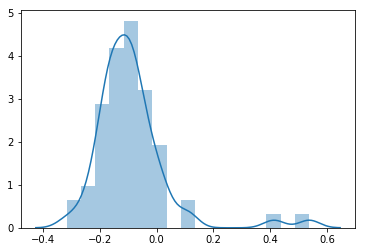

In [56]:
sns.distplot(res)